# Bike Sharing Dataset

For Downloading the DataSet (https://github.com/shubh2002/DataSets)

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
df=pd.read_csv('bike_sharing_hours.csv')

In [3]:
df.shape

(17379, 17)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df.rename(columns={'instant':'ID','dteday':'Date','season':'Season','yr':'Year','mnth':'Month','hr':'Hour','hum':'Humidity'
                 ,'cnt':'Count'},inplace=True)

In [6]:
df=df.drop(['Date','ID'],axis=1)

In [7]:
df.head()

,Season,Year,Month,Hour,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
df.describe()

,Season,Year,Month,Hour,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,Count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


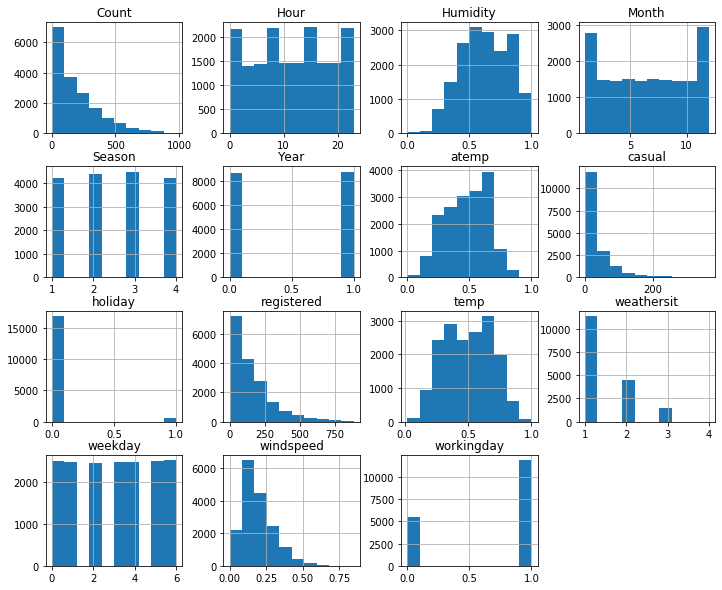

In [9]:
df.hist(figsize=(12,10))
plt.show()

C:\Users\SHUBHAM\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x1008 with 0 Axes>

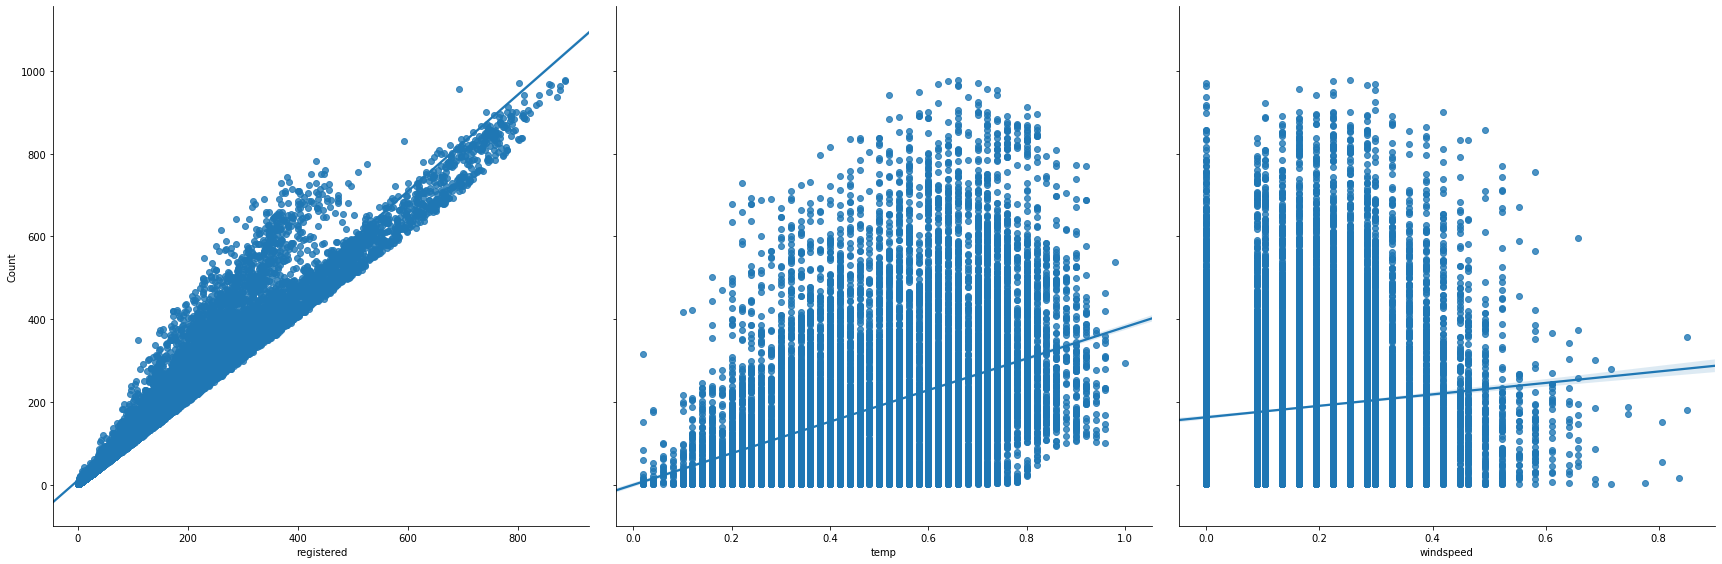

In [10]:
plt.figure(figsize=(16,14))
sns.pairplot(df,x_vars=['registered','temp','windspeed'],y_vars=['Count'],kind='reg',size=8.0)

<Figure size 1152x1008 with 0 Axes>

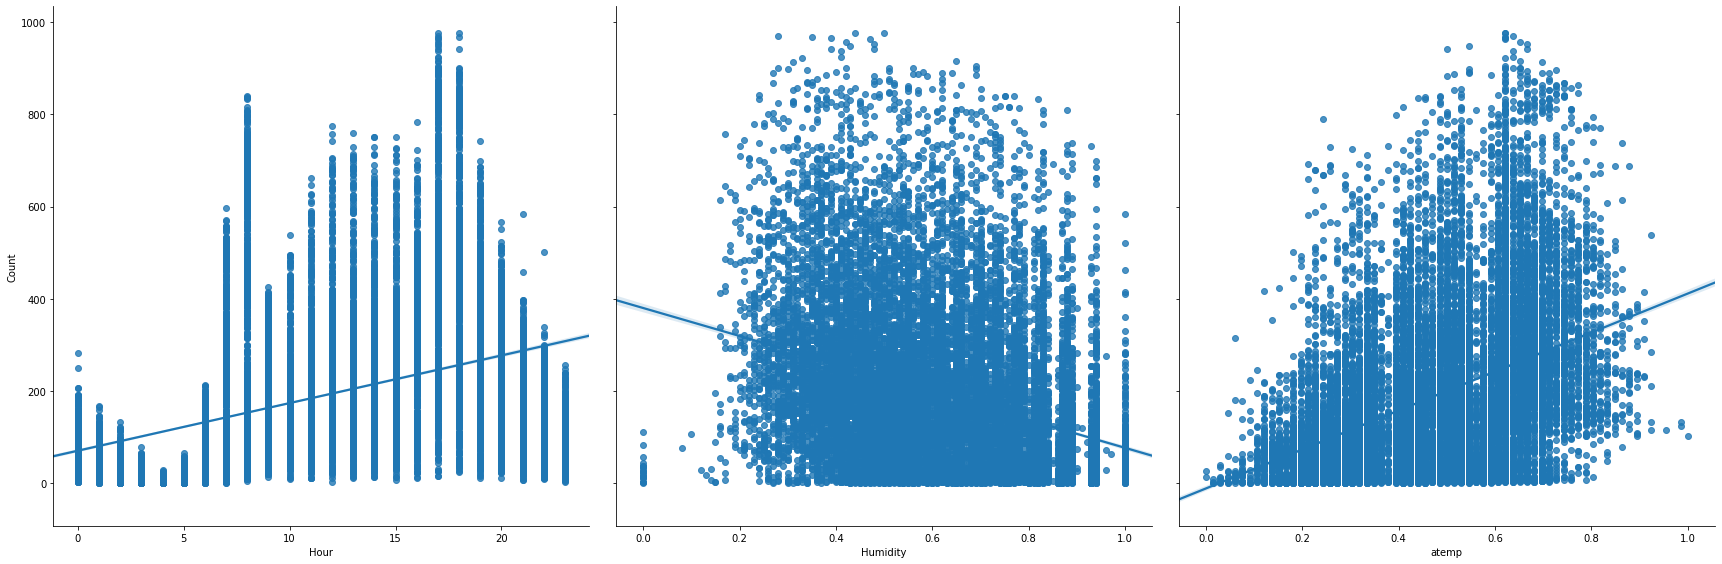

In [11]:
plt.figure(figsize=(16,14))
sns.pairplot(df,x_vars=['Hour','Humidity','atemp'],y_vars=['Count'],kind='reg',size=8.0)

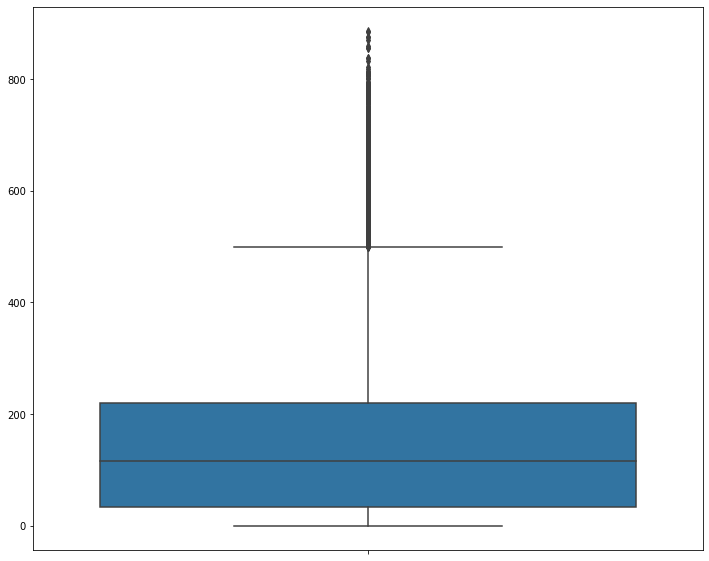

In [12]:
plt.figure(figsize=(12,10))
sns.boxplot(y=['registered'],data=df)

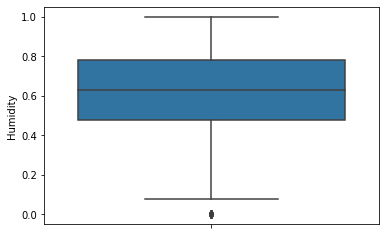

In [13]:
sns.boxplot(data=df,y=df['Humidity'])

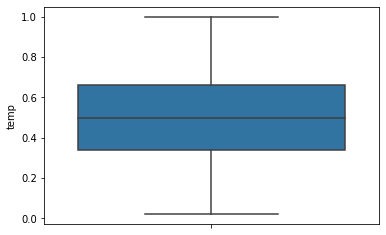

In [14]:
sns.boxplot(data=df,y=df['temp'])

In [15]:
x=df.iloc[:,df.columns!='Count']
y=df.iloc[:,df.columns=='Count']

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler(feature_range=(0,5))
x_scaled=scaling.fit_transform(x)


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y.values,test_size=.25,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
MAE=mean_absolute_error(y_test,y_pred)
print('MEAN SQUARED ERROR:',MSE)
print('ROOT MEAN SQUARED ERROR:',RMSE)
print('MEAN ABSOLUTE ERROR:',MAE)


MEAN SQUARED ERROR: 1.1267340306006097e-24
ROOT MEAN SQUARED ERROR: 1.0614772868981274e-12
MEAN ABSOLUTE ERROR: 1.0519272960687526e-12


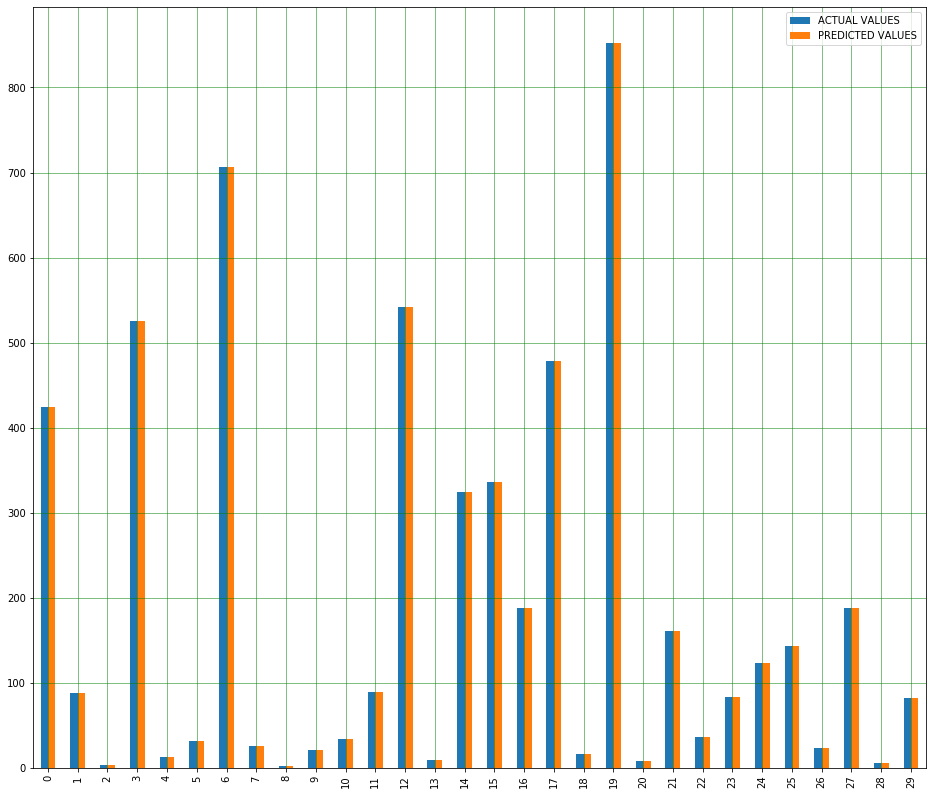

In [19]:

df2=pd.DataFrame({'ACTUAL VALUES':y_test.flatten(),'PREDICTED VALUES':y_pred.flatten()})
df3=df2.head(30)
df3.plot(kind='bar',figsize=(16,14))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.show()

In [20]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
MAE=mean_absolute_error(y_test,y_pred)
print('MEAN SQUARED ERROR:',MSE)
print('ROOT MEAN SQUARED ERROR:',RMSE)
print('MEAN ABSOLUTE ERROR:',MAE)



MEAN SQUARED ERROR: 23.43843498273878
ROOT MEAN SQUARED ERROR: 4.8413257463982715
MEAN ABSOLUTE ERROR: 2.2872266973532795


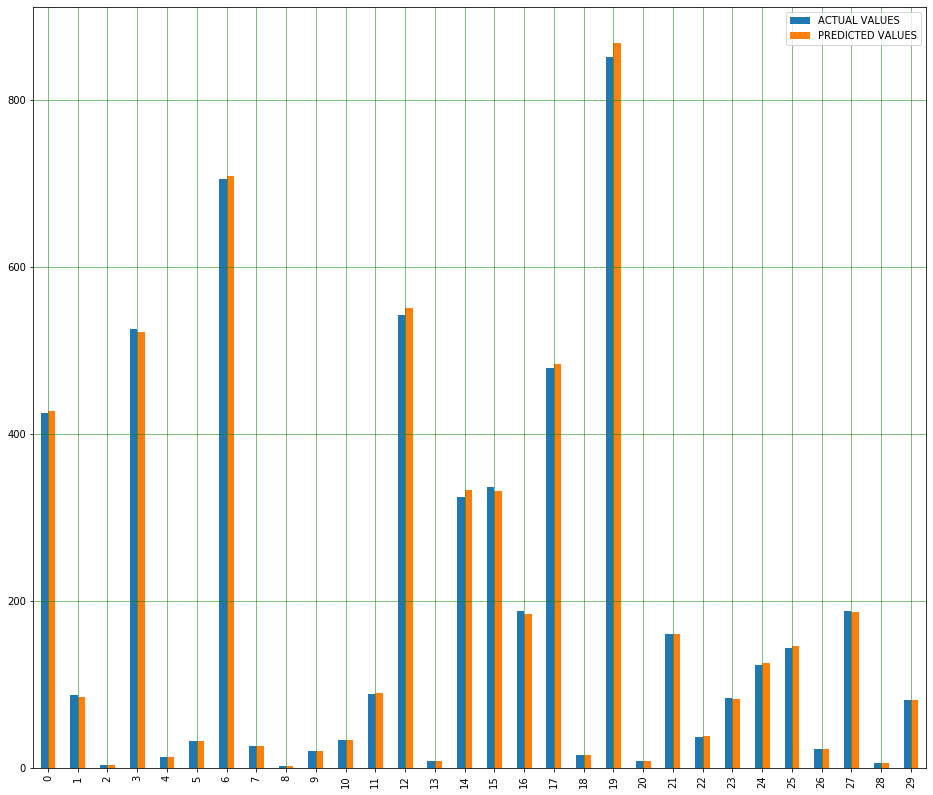

In [21]:
df4=pd.DataFrame({'ACTUAL VALUES':y_test.flatten(),'PREDICTED VALUES':y_pred.flatten()})
df5=df4.head(30)
df5.plot(kind='bar',figsize=(16,14))
plt.grid(color='green',linewidth='0.5',linestyle='-',which='major')
plt.show()

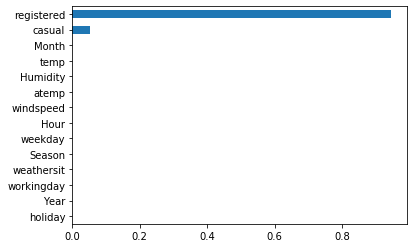

In [22]:
feat_imp=pd.Series(model2.feature_importances_,index=x.columns)
feat_imp=feat_imp.sort_values(ascending=True)
feat_imp.plot(kind='barh')